# ENEM - Success or Unsuccess
### An Classification problem

Starting slowly, we intend to define whether a participant would be successful or not on ENEM tests based on their socioeconomical status, so, we chose to use the learning model `LinearSVG`, a Linear Support Vector Classification to predict this.

In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [2]:
#Import Filtered Dataset containing the selected features
dataEnem = pd.read_csv ("DataEnemQuestionsParsed.csv", encoding='ISO-8859-1')

In [3]:
brDataEnem = dataEnem
brDataEnem.head()

,Unnamed: 0,Unnamed: 0.1,NU_INSCRICAO,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ESCOLA,TP_ENSINO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,0,2,190001004629,1,2,3,1.0,PA,4.0,1.0,...,2,1,1,4,2,2,4,1,3,2
1,1,7,190001004634,1,2,2,1.0,PA,2.0,1.0,...,1,1,1,2,1,1,2,1,1,1
2,2,15,190001004642,1,2,2,NaN,PA,2.0,1.0,...,1,1,1,2,2,1,4,1,1,1
3,3,16,190001004643,1,2,2,1.0,PA,2.0,1.0,...,1,1,1,4,1,1,3,1,1,1
4,4,24,190001004651,1,2,2,1.0,PA,2.0,1.0,...,2,1,1,2,1,1,4,1,1,2


## Mapping questions inputs
We chose to map the inputs using the alphabetical order so that there is no hierarchical loss in the value of the results according to the data dictionary.

In [4]:
#Parsing Questions to Numbers
#Q005 already has numbers as input
#questions = ['Q001', 'Q002', 'Q003', 'Q004', 'Q006', 'Q007', 'Q008', 
     #        'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014','Q015', 'Q016', 
   #          'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022','Q023', 'Q024', 'Q025']

#for i in questions:
#    brDataEnem[i] = [ ord(x) - 64 for x in brDataEnem[i] ]
#brDataEnem.head()

## Success and Unsuccess definition

In [5]:
#Finds the median for every test
medianRe = brDataEnem['NU_NOTA_REDACAO'].median()
medianCN = brDataEnem['NU_NOTA_CN'].median()
medianCH = brDataEnem['NU_NOTA_CH'].median()
medianLC = brDataEnem['NU_NOTA_LC'].median()
medianMT = brDataEnem['NU_NOTA_MT'].median()
   

Creating an aditional boolean column for each test that defines it's success

In [6]:
#Create a new column called brDataEnem.[TestName] where the value
#is yes if the score is greater than the median and 0 otherwise.
#1 = greater than median, 0 = lesser than median
brDataEnem['Re'] = np.where(brDataEnem['NU_NOTA_REDACAO'] >= medianRe, 1, 0)
brDataEnem['CN'] = np.where(brDataEnem['NU_NOTA_CN'] >= medianCN, 1, 0)
brDataEnem['CH'] = np.where(brDataEnem['NU_NOTA_CH'] >= medianCH, 1, 0)
brDataEnem['LC'] = np.where(brDataEnem['NU_NOTA_LC'] >= medianLC, 1, 0)
brDataEnem['MT'] = np.where(brDataEnem['NU_NOTA_MT'] >= medianMT, 1, 0)

#Create a series for baseline algorithm
brDataEnem['BASELINE_TP_ESCOLA'] = np.where(brDataEnem['TP_ESCOLA'] == 2, 0, 1)


# Math

In [7]:
#Getting features and labels that will be used in classification
X = brDataEnem[['TP_ESCOLA','Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
                'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
                'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
                'Q023', 'Q024', 'Q025', 'TP_DEPENDENCIA_ADM_ESC']]
y = brDataEnem['MT']

In [8]:
#Defining the training set 
SEED = 30
treino_x, teste_x, treino_y, teste_y = train_test_split(X, y, random_state = SEED, test_size = 0.25)


In [9]:
#Traning
modelo = make_pipeline(StandardScaler(),LinearSVC(dual=False, max_iter=5000))
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100

treino_y.value_counts()

0    345752
1    345666
Name: MT, dtype: int64

#### Comparting to baseline

In [10]:
def baseline_testing(teste_y):
    #Baseline using the type of school
    base_escola = brDataEnem['BASELINE_TP_ESCOLA'].to_numpy()
    base_escola_teste = base_escola[:len(teste_y.index)]
    acuracia_base = accuracy_score(teste_y, base_escola_teste) * 100
    print("The baseline accuracy using the type of school was %.2f%%" % acuracia_base)

    #Baseline all ones
    all_ones = np.ones((len(teste_y.index)))
    acuracia_base = accuracy_score(teste_y, all_ones) * 100
    print("The random baseline accuracy was %.2f%%" % acuracia_base)

print("Accuracy: %.2f%%" % acuracia)
baseline_testing(teste_y)

Accuracy: 66.87%
The baseline accuracy using the type of school was 49.95%
The random baseline accuracy was 50.02%


#### Features Relevance

27
['q001', 'q002', 'q003', 'q004', 'q005', 'q006', 'q007', 'q008', 'q009', 'q010', 'q011', 'q012', 'q013', 'q014', 'q015', 'q016', 'q017', 'q018', 'q019', 'q020', 'q021', 'q022', 'q023', 'q024', 'q025', 'tp_dependencia_adm_esc', 'tp_escola']


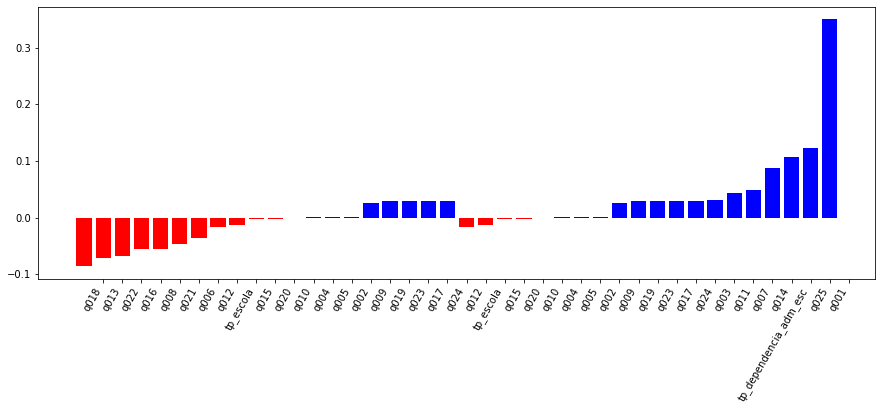

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

def plot_coefficients(classifier, feature_names, top_features=20):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 
# create plot
 plt.figure(figsize=(15, 5))
 colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
 plt.show()

cv = CountVectorizer()
cv.fit(X)
print(len(cv.vocabulary_))
print(cv.get_feature_names())
#X_train = cv.transform(data)

svm = LinearSVC(dual=False, max_iter=5000)
svm.fit(treino_x, treino_y)
plot_coefficients(svm, cv.get_feature_names())

# Languages

In [12]:
y = brDataEnem['LC']

#Defining the training set 
SEED = 30
treino_x, teste_x, treino_y, teste_y = train_test_split(X, y, random_state = SEED, test_size = 0.25)

#Traning
modelo = make_pipeline(StandardScaler(),LinearSVC(dual=False, max_iter=5000))
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100
treino_y.value_counts()

1    345888
0    345530
Name: LC, dtype: int64

#### Comparing to baseline

In [13]:
print("Accuracy: %.2f%%" % acuracia)
baseline_testing(teste_y)

Accuracy: 68.38%
The baseline accuracy using the type of school was 49.93%
The random baseline accuracy was 50.02%


# Natural Sciences


In [14]:
y = brDataEnem['CN']

#Defining the training set 
SEED = 30
treino_x, teste_x, treino_y, teste_y = train_test_split(X, y, random_state = SEED, test_size = 0.25)

#Traning
modelo = make_pipeline(StandardScaler(),LinearSVC(dual=False, max_iter=5000))
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100
treino_y.value_counts()




0    345826
1    345592
Name: CN, dtype: int64

#### Comparing to baseline

In [15]:
print("Accuracy: %.2f%%" % acuracia)
baseline_testing(teste_y)

Accuracy: 66.53%
The baseline accuracy using the type of school was 49.82%
The random baseline accuracy was 50.16%


# Human Sciences

In [16]:
y = brDataEnem['CH']

#Defining the training set 
SEED = 30
treino_x, teste_x, treino_y, teste_y = train_test_split(X, y, random_state = SEED, test_size = 0.25)

#Traning
modelo = make_pipeline(StandardScaler(),LinearSVC(dual=False, max_iter=5000))
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100
treino_y.value_counts()



1    346008
0    345410
Name: CH, dtype: int64

#### Comparing to baseline

In [17]:
print("Accuracy: %.2f%%" % acuracia)
baseline_testing(teste_y)

Accuracy: 67.06%
The baseline accuracy using the type of school was 49.83%
The random baseline accuracy was 50.01%


# Writing

In [18]:
y = brDataEnem['Re']

#Defining the training set 
SEED = 30
treino_x, teste_x, treino_y, teste_y = train_test_split(X, y, random_state = SEED, test_size = 0.25)

#Traning
modelo = make_pipeline(StandardScaler(),LinearSVC(dual=False, max_iter=5000))
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100
treino_y.value_counts()


1    350308
0    341110
Name: Re, dtype: int64

#### Comparing to baseline

In [19]:
print("Accuracy: %.2f%%" % acuracia)
baseline_testing(teste_y)

Accuracy: 63.84%
The baseline accuracy using the type of school was 49.42%
The random baseline accuracy was 50.66%
